In [1]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from scipy.stats import linregress
%matplotlib inline

df_tweets = pd.read_excel(r'C:\Users\timod\Desktop\SPX_tweets_all.xlsx')
df_price = pd.read_csv(r'C:\Users\timod\Desktop\SPX_historical data_all.csv')


In [9]:
df_tweets.head()

,date,text,follower_count,polarity,subjectivity
0,2020-03-27,b'Can\xe2\x80\x99t stop watching above chart.\...,12284,0.225,0.4
1,2020-03-27,"b""Shamelessly asking\n\n$TSLAQ $TSLA $SPX $SPY...",777,0.000,0.0
2,2020-03-27,b'S&amp;P 500 | $SPX | $SPX500 $USD\n\ntest\n\...,1860,0.000,0.3
3,2020-03-27,b'Mark Snow - Trail Of Stolen Pebbles (The X-F...,206,0.000,0.0
4,2020-03-27,b'Variations In REIT Sectors - Time To Go Defe...,3516,0.000,0.0


In [10]:
df_price

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 27, 2020","2,541.47","2,555.87","2,615.91","2,520.02",-,-3.37%
1,"Mar 26, 2020","2,630.07","2,501.29","2,637.01","2,500.72",-,6.24%
2,"Mar 25, 2020","2,475.56","2,457.77","2,571.42","2,407.53",-,1.15%
3,"Mar 24, 2020","2,447.33","2,344.44","2,449.71","2,344.44",-,9.38%
4,"Mar 23, 2020","2,237.40","2,290.71","2,300.73","2,191.86",-,-2.93%
5,"Mar 20, 2020","2,304.92","2,431.94","2,453.01","2,295.56",-,-4.34%
6,"Mar 19, 2020","2,409.39","2,393.48","2,466.97","2,319.78",-,0.47%
7,"Mar 18, 2020","2,398.10","2,436.50","2,453.57","2,280.52",-,-5.18%
8,"Mar 17, 2020","2,529.19","2,425.66","2,553.93","2,367.04",-,6.00%
9,"Mar 16, 2020","2,386.13","2,508.59","2,562.98","2,380.94",-,-11.98%


In [3]:
#Gathering the following for each of the first seven days of february:
#number of positive tweets, number of negative tweets, number of neutral tweets, total volume, sentiment polarity

'''
pos0331 = df_tweets.loc[df_tweets.date=='2020-03-31'][df_tweets.polarity > 0].shape[0]
neg0331 = df_tweets.loc[df_tweets.date=='2020-03-31'][df_tweets.polarity < 0].shape[0]
neutral0331 = df_tweets.loc[df_tweets.date=='2020-03-31'][df_tweets.polarity == 0].shape[0]
nonZero0331 = pos0331 + neg0331
px0331 = round(((pos0331-neg0331)/nonZero0331),3)
volume0331 = nonZero0331 + neutral0331

pos0330 = df_tweets.loc[df_tweets.date=='2020-03-30'][df_tweets.polarity > 0].shape[0]
neg0330 = df_tweets.loc[df_tweets.date=='2020-03-30'][df_tweets.polarity < 0].shape[0]
neutral0330 = df_tweets.loc[df_tweets.date=='2020-03-30'][df_tweets.polarity == 0].shape[0]
nonZero0330 = pos0330 + neg0330
px0330 = round(((pos0330-neg0330)/nonZero0330),3)
volume0330 = nonZero0330 + neutral0330

pos0329 = df_tweets.loc[df_tweets.date=='2020-03-29'][df_tweets.polarity > 0].shape[0]
neg0329 = df_tweets.loc[df_tweets.date=='2020-03-29'][df_tweets.polarity < 0].shape[0]
neutral0329 = df_tweets.loc[df_tweets.date=='2020-03-29'][df_tweets.polarity == 0].shape[0]
nonZero0329 = pos0329 + neg0329
px0329 = round(((pos0329-neg0329)/nonZero0329),3)
volume0329 = nonZero0329 + neutral0329

pos0328 = df_tweets.loc[df_tweets.date=='2020-03-28'][df_tweets.polarity > 0].shape[0]
neg0328 = df_tweets.loc[df_tweets.date=='2020-03-28'][df_tweets.polarity < 0].shape[0]
neutral0328 = df_tweets.loc[df_tweets.date=='2020-03-28'][df_tweets.polarity == 0].shape[0]
nonZero0328 = pos0328 + neg0328
px0328 = round(((pos0328-neg0328)/nonZero0328),3)
volume0328 = nonZero0328 + neutral0328
'''

pos0327 = df_tweets.loc[df_tweets.date=='2020-03-27'][df_tweets.polarity > 0].shape[0]
neg0327 = df_tweets.loc[df_tweets.date=='2020-03-27'][df_tweets.polarity < 0].shape[0]
neutral0327 = df_tweets.loc[df_tweets.date=='2020-03-27'][df_tweets.polarity == 0].shape[0]
nonZero0327 = pos0327 + neg0327
px0327 = round(((pos0327-neg0327)/nonZero0327),3)
volume0327 = nonZero0327 + neutral0327


pos0326 = df_tweets.loc[df_tweets.date=='2020-03-26'][df_tweets.polarity > 0].shape[0]
neg0326 = df_tweets.loc[df_tweets.date=='2020-03-26'][df_tweets.polarity < 0].shape[0]
neutral0326 = df_tweets.loc[df_tweets.date=='2020-03-26'][df_tweets.polarity == 0].shape[0]
nonZero0326 = pos0326 + neg0326
px0326 = round(((pos0326-neg0326)/nonZero0326),3)
volume0326 = nonZero0326 + neutral0326

pos0325 = df_tweets.loc[df_tweets.date=='2020-03-25'][df_tweets.polarity > 0].shape[0]
neg0325 = df_tweets.loc[df_tweets.date=='2020-03-25'][df_tweets.polarity < 0].shape[0]
neutral0325 = df_tweets.loc[df_tweets.date=='2020-03-25'][df_tweets.polarity == 0].shape[0]
nonZero0325 = pos0325 + neg0325
px0325 = round(((pos0325-neg0325)/nonZero0325),3)
volume0325 = nonZero0325 + neutral0325

pos0324 = df_tweets.loc[df_tweets.date=='2020-03-24'][df_tweets.polarity > 0].shape[0]
neg0324 = df_tweets.loc[df_tweets.date=='2020-03-24'][df_tweets.polarity < 0].shape[0]
neutral0324 = df_tweets.loc[df_tweets.date=='2020-03-24'][df_tweets.polarity == 0].shape[0]
nonZero0324 = pos0324 + neg0324
px0324 = round(((pos0324-neg0324)/nonZero0324),3)
volume0324 = nonZero0324 + neutral0324

pos0323 = df_tweets.loc[df_tweets.date=='2020-03-23'][df_tweets.polarity > 0].shape[0]
neg0323 = df_tweets.loc[df_tweets.date=='2020-03-23'][df_tweets.polarity < 0].shape[0]
neutral0323 = df_tweets.loc[df_tweets.date=='2020-03-23'][df_tweets.polarity == 0].shape[0]
nonZero0323 = pos0323 + neg0323
px0323 = round(((pos0323-neg0323)/nonZero0323),3)
volume0323 = nonZero0323 + neutral0323

'''
pos0322 = df_tweets.loc[df_tweets.date=='2020-03-22'][df_tweets.polarity > 0].shape[0]
neg0322 = df_tweets.loc[df_tweets.date=='2020-03-22'][df_tweets.polarity < 0].shape[0]
neutral0322 = df_tweets.loc[df_tweets.date=='2020-03-22'][df_tweets.polarity == 0].shape[0]
nonZero0322 = pos0322 + neg0322
px0322 = round(((pos0322-neg0322)/nonZero0322),3)
volume0322 = nonZero0322 + neutral0322

pos0321 = df_tweets.loc[df_tweets.date=='2020-03-21'][df_tweets.polarity > 0].shape[0]
neg0321 = df_tweets.loc[df_tweets.date=='2020-03-21'][df_tweets.polarity < 0].shape[0]
neutral0321 = df_tweets.loc[df_tweets.date=='2020-03-21'][df_tweets.polarity == 0].shape[0]
nonZero0321 = pos0321 + neg0321
px0321 = round(((pos0321-neg0321)/nonZero0321),3)
volume0321 = nonZero0321 + neutral0321
'''

pos0320 = df_tweets.loc[df_tweets.date=='2020-03-20'][df_tweets.polarity > 0].shape[0]
neg0320 = df_tweets.loc[df_tweets.date=='2020-03-20'][df_tweets.polarity < 0].shape[0]
neutral0320 = df_tweets.loc[df_tweets.date=='2020-03-20'][df_tweets.polarity == 0].shape[0]
nonZero0320 = pos0320 + neg0320
px0320 = round(((pos0320-neg0320)/nonZero0320),3)
volume0320 = nonZero0320 + neutral0320

pos0319 = df_tweets.loc[df_tweets.date=='2020-03-19'][df_tweets.polarity > 0].shape[0]
neg0319 = df_tweets.loc[df_tweets.date=='2020-03-19'][df_tweets.polarity < 0].shape[0]
neutral0319 = df_tweets.loc[df_tweets.date=='2020-03-19'][df_tweets.polarity == 0].shape[0]
nonZero0319 = pos0319 + neg0319
px0319 = round(((pos0319-neg0319)/nonZero0319),3)
volume0319 = nonZero0319 + neutral0319

pos0318 = df_tweets.loc[df_tweets.date=='2020-03-18'][df_tweets.polarity > 0].shape[0]
neg0318 = df_tweets.loc[df_tweets.date=='2020-03-18'][df_tweets.polarity < 0].shape[0]
neutral0318 = df_tweets.loc[df_tweets.date=='2020-03-18'][df_tweets.polarity == 0].shape[0]
nonZero0318 = pos0318 + neg0318
px0318 = round(((pos0318-neg0318)/nonZero0318),3)
volume0318 = nonZero0318 + neutral0318

pos0317 = df_tweets.loc[df_tweets.date=='2020-03-17'][df_tweets.polarity > 0].shape[0]
neg0317 = df_tweets.loc[df_tweets.date=='2020-03-17'][df_tweets.polarity < 0].shape[0]
neutral0317 = df_tweets.loc[df_tweets.date=='2020-03-17'][df_tweets.polarity == 0].shape[0]
nonZero0317 = pos0317 + neg0317
px0317 = round(((pos0317-neg0317)/nonZero0317),3)
volume0317 = nonZero0317 + neutral0317

pos0316 = df_tweets.loc[df_tweets.date=='2020-03-16'][df_tweets.polarity > 0].shape[0]
neg0316 = df_tweets.loc[df_tweets.date=='2020-03-16'][df_tweets.polarity < 0].shape[0]
neutral0316 = df_tweets.loc[df_tweets.date=='2020-03-16'][df_tweets.polarity == 0].shape[0]
nonZero0316 = pos0316 + neg0316
px0316 = round(((pos0316-neg0316)/nonZero0316),3)
volume0316 = nonZero0316 + neutral0316

'''
pos0315 = df_tweets.loc[df_tweets.date=='2020-03-15'][df_tweets.polarity > 0].shape[0]
neg0315 = df_tweets.loc[df_tweets.date=='2020-03-15'][df_tweets.polarity < 0].shape[0]
neutral0315 = df_tweets.loc[df_tweets.date=='2020-03-15'][df_tweets.polarity == 0].shape[0]
nonZero0315 = pos0315 + neg0315
px0315 = round(((pos0315-neg0315)/nonZero0315),3)
volume0315 = nonZero0315 + neutral0315

pos0314 = df_tweets.loc[df_tweets.date=='2020-03-14'][df_tweets.polarity > 0].shape[0]
neg0314 = df_tweets.loc[df_tweets.date=='2020-03-14'][df_tweets.polarity < 0].shape[0]
neutral0314 = df_tweets.loc[df_tweets.date=='2020-03-14'][df_tweets.polarity == 0].shape[0]
nonZero0314 = pos0314 + neg0314
px0314 = round(((pos0314-neg0314)/nonZero0314),3)
volume0314 = nonZero0314 + neutral0314
'''

pos0313 = df_tweets.loc[df_tweets.date=='2020-03-13'][df_tweets.polarity > 0].shape[0]
neg0313 = df_tweets.loc[df_tweets.date=='2020-03-13'][df_tweets.polarity < 0].shape[0]
neutral0313 = df_tweets.loc[df_tweets.date=='2020-03-13'][df_tweets.polarity == 0].shape[0]
nonZero0313 = pos0313 + neg0313
px0313 = round(((pos0313-neg0313)/nonZero0313),3)
volume0313 = nonZero0313 + neutral0313

pos0312 = df_tweets.loc[df_tweets.date=='2020-03-12'][df_tweets.polarity > 0].shape[0]
neg0312 = df_tweets.loc[df_tweets.date=='2020-03-12'][df_tweets.polarity < 0].shape[0]
neutral0312 = df_tweets.loc[df_tweets.date=='2020-03-12'][df_tweets.polarity == 0].shape[0]
nonZero0312 = pos0312 + neg0312
px0312 = round(((pos0312-neg0312)/nonZero0312),3)
volume0312 = nonZero0312 + neutral0312

pos0311 = df_tweets.loc[df_tweets.date=='2020-03-11'][df_tweets.polarity > 0].shape[0]
neg0311 = df_tweets.loc[df_tweets.date=='2020-03-11'][df_tweets.polarity < 0].shape[0]
neutral0311 = df_tweets.loc[df_tweets.date=='2020-03-11'][df_tweets.polarity == 0].shape[0]
nonZero0311 = pos0311 + neg0311
px0311 = round(((pos0311-neg0311)/nonZero0311),3)
volume0311 = nonZero0311 + neutral0311

pos0310 = df_tweets.loc[df_tweets.date=='2020-03-10'][df_tweets.polarity > 0].shape[0]
neg0310 = df_tweets.loc[df_tweets.date=='2020-03-10'][df_tweets.polarity < 0].shape[0]
neutral0310 = df_tweets.loc[df_tweets.date=='2020-03-10'][df_tweets.polarity == 0].shape[0]
nonZero0310 = pos0310 + neg0310
px0310 = round(((pos0310-neg0310)/nonZero0310),3)
volume0310 = nonZero0310 + neutral0310

pos0309 = df_tweets.loc[df_tweets.date=='2020-03-09'][df_tweets.polarity > 0].shape[0]
neg0309 = df_tweets.loc[df_tweets.date=='2020-03-09'][df_tweets.polarity < 0].shape[0]
neutral0309 = df_tweets.loc[df_tweets.date=='2020-03-09'][df_tweets.polarity == 0].shape[0]
nonZero0309 = pos0309 + neg0309
px0309 = round(((pos0309-neg0309)/nonZero0309),3)
volume0309 = nonZero0309 + neutral0309

'''
pos0308 = df_tweets.loc[df_tweets.date=='2020-03-08'][df_tweets.polarity > 0].shape[0]
neg0308 = df_tweets.loc[df_tweets.date=='2020-03-08'][df_tweets.polarity < 0].shape[0]
neutral0308 = df_tweets.loc[df_tweets.date=='2020-03-08'][df_tweets.polarity == 0].shape[0]
nonZero0308 = pos0308 + neg0308
px0308 = round(((pos0308-neg0308)/nonZero0308),3)
volume0308 = nonZero0308 + neutral0308

pos0307 = df_tweets.loc[df_tweets.date=='2020-03-07'][df_tweets.polarity > 0].shape[0]
neg0307 = df_tweets.loc[df_tweets.date=='2020-03-07'][df_tweets.polarity < 0].shape[0]
neutral0307 = df_tweets.loc[df_tweets.date=='2020-03-07'][df_tweets.polarity == 0].shape[0]
nonZero0307 = pos0307 + neg0307
px0307 = round(((pos0307-neg0307)/nonZero0307),3)
volume0307 = nonZero0307 + neutral0307
'''

pos0306 = df_tweets.loc[df_tweets.date=='2020-03-06'][df_tweets.polarity > 0].shape[0]
neg0306 = df_tweets.loc[df_tweets.date=='2020-03-06'][df_tweets.polarity < 0].shape[0]
neutral0306 = df_tweets.loc[df_tweets.date=='2020-03-06'][df_tweets.polarity == 0].shape[0]
nonZero0306 = pos0306 + neg0306
px0306 = round(((pos0306-neg0306)/nonZero0306),3)
volume0306 = nonZero0306 + neutral0306

pos0305 = df_tweets.loc[df_tweets.date=='2020-03-05'][df_tweets.polarity > 0].shape[0]
neg0305 = df_tweets.loc[df_tweets.date=='2020-03-05'][df_tweets.polarity < 0].shape[0]
neutral0305 = df_tweets.loc[df_tweets.date=='2020-03-05'][df_tweets.polarity == 0].shape[0]
nonZero0305 = pos0305 + neg0305
px0305 = round(((pos0305-neg0305)/nonZero0305),3)
volume0305 = nonZero0305 + neutral0305

pos0304 = df_tweets.loc[df_tweets.date=='2020-03-04'][df_tweets.polarity > 0].shape[0]
neg0304 = df_tweets.loc[df_tweets.date=='2020-03-04'][df_tweets.polarity < 0].shape[0]
neutral0304 = df_tweets.loc[df_tweets.date=='2020-03-04'][df_tweets.polarity == 0].shape[0]
nonZero0304 = pos0304 + neg0304
px0304 = round(((pos0304-neg0304)/nonZero0304),3)
volume0304 = nonZero0304 + neutral0304

pos0303 = df_tweets.loc[df_tweets.date=='2020-03-03'][df_tweets.polarity > 0].shape[0]
neg0303 = df_tweets.loc[df_tweets.date=='2020-03-03'][df_tweets.polarity < 0].shape[0]
neutral0303 = df_tweets.loc[df_tweets.date=='2020-03-03'][df_tweets.polarity == 0].shape[0]
nonZero0303 = pos0303 + neg0303
px0303 = round(((pos0303-neg0303)/nonZero0303),3)
volume0303 = nonZero0303 + neutral0303

pos0302 = df_tweets.loc[df_tweets.date=='2020-03-02'][df_tweets.polarity > 0].shape[0]
neg0302 = df_tweets.loc[df_tweets.date=='2020-03-02'][df_tweets.polarity < 0].shape[0]
neutral0302 = df_tweets.loc[df_tweets.date=='2020-03-02'][df_tweets.polarity == 0].shape[0]
nonZero0302 = pos0302 + neg0302
px0302 = round(((pos0302-neg0302)/nonZero0302),3)
volume0302 = nonZero0302 + neutral0302

'''
pos0301 = df_tweets.loc[df_tweets.date=='2020-03-01'][df_tweets.polarity > 0].shape[0]
neg0301 = df_tweets.loc[df_tweets.date=='2020-03-01'][df_tweets.polarity < 0].shape[0]
neutral0301 = df_tweets.loc[df_tweets.date=='2020-03-01'][df_tweets.polarity == 0].shape[0]
nonZero0301 = pos0301 + neg0301
px0301 = round(((pos0301-neg0301)/nonZero0301),3)
volume0301 = nonZero0301 + neutral0301

pos0229 = df_tweets.loc[df_tweets.date=='2020-02-29'][df_tweets.polarity > 0].shape[0]
neg0229 = df_tweets.loc[df_tweets.date=='2020-02-29'][df_tweets.polarity < 0].shape[0]
neutral0229 = df_tweets.loc[df_tweets.date=='2020-02-29'][df_tweets.polarity == 0].shape[0]
nonZero0229 = pos0229 + neg0229
px0229 = round(((pos0229-neg0229)/nonZero0229),3)
volume0229 = nonZero0229 + neutral0229
'''

pos0228 = df_tweets.loc[df_tweets.date=='2020-02-28'][df_tweets.polarity > 0].shape[0]
neg0228 = df_tweets.loc[df_tweets.date=='2020-02-28'][df_tweets.polarity < 0].shape[0]
neutral0228 = df_tweets.loc[df_tweets.date=='2020-02-28'][df_tweets.polarity == 0].shape[0]
nonZero0228 = pos0228 + neg0228
px0228 = round(((pos0228-neg0228)/nonZero0228),3)
volume0228 = nonZero0228 + neutral0228

pos0227 = df_tweets.loc[df_tweets.date=='2020-02-27'][df_tweets.polarity > 0].shape[0]
neg0227 = df_tweets.loc[df_tweets.date=='2020-02-27'][df_tweets.polarity < 0].shape[0]
neutral0227 = df_tweets.loc[df_tweets.date=='2020-02-27'][df_tweets.polarity == 0].shape[0]
nonZero0227 = pos0227 + neg0227
px0227 = round(((pos0227-neg0227)/nonZero0227),3)
volume0227 = nonZero0227 + neutral0227

pos0226 = df_tweets.loc[df_tweets.date=='2020-02-26'][df_tweets.polarity > 0].shape[0]
neg0226 = df_tweets.loc[df_tweets.date=='2020-02-26'][df_tweets.polarity < 0].shape[0]
neutral0226 = df_tweets.loc[df_tweets.date=='2020-02-26'][df_tweets.polarity == 0].shape[0]
nonZero0226 = pos0226 + neg0226
px0226 = round(((pos0226-neg0226)/nonZero0226),3)
volume0226 = nonZero0226 + neutral0226

pos0225 = df_tweets.loc[df_tweets.date=='2020-02-25'][df_tweets.polarity > 0].shape[0]
neg0225 = df_tweets.loc[df_tweets.date=='2020-02-25'][df_tweets.polarity < 0].shape[0]
neutral0225 = df_tweets.loc[df_tweets.date=='2020-02-25'][df_tweets.polarity == 0].shape[0]
nonZero0225 = pos0225 + neg0225
px0225 = round(((pos0225-neg0225)/nonZero0225),3)
volume0225 = nonZero0225 + neutral0225

pos0224 = df_tweets.loc[df_tweets.date=='2020-02-24'][df_tweets.polarity > 0].shape[0]
neg0224 = df_tweets.loc[df_tweets.date=='2020-02-24'][df_tweets.polarity < 0].shape[0]
neutral0224 = df_tweets.loc[df_tweets.date=='2020-02-24'][df_tweets.polarity == 0].shape[0]
nonZero0224 = pos0224 + neg0224
px0224 = round(((pos0224-neg0224)/nonZero0224),3)
volume0224 = nonZero0224 + neutral0224

'''
pos0223 = df_tweets.loc[df_tweets.date=='2020-02-23'][df_tweets.polarity > 0].shape[0]
neg0223 = df_tweets.loc[df_tweets.date=='2020-02-23'][df_tweets.polarity < 0].shape[0]
neutral0223 = df_tweets.loc[df_tweets.date=='2020-02-23'][df_tweets.polarity == 0].shape[0]
nonZero0223 = pos0223 + neg0223
px0223 = round(((pos0223-neg0223)/nonZero0223),3)
volume0223 = nonZero0223 + neutral0223

pos0222 = df_tweets.loc[df_tweets.date=='2020-02-22'][df_tweets.polarity > 0].shape[0]
neg0222 = df_tweets.loc[df_tweets.date=='2020-02-22'][df_tweets.polarity < 0].shape[0]
neutral0222 = df_tweets.loc[df_tweets.date=='2020-02-22'][df_tweets.polarity == 0].shape[0]
nonZero0222 = pos0222 + neg0222
px0222 = round(((pos0222-neg0222)/nonZero0222),3)
volume0222 = nonZero0222 + neutral0222
'''

pos0221 = df_tweets.loc[df_tweets.date=='2020-02-21'][df_tweets.polarity > 0].shape[0]
neg0221 = df_tweets.loc[df_tweets.date=='2020-02-21'][df_tweets.polarity < 0].shape[0]
neutral0221 = df_tweets.loc[df_tweets.date=='2020-02-21'][df_tweets.polarity == 0].shape[0]
nonZero0221 = pos0221 + neg0221
px0221 = round(((pos0221-neg0221)/nonZero0221),3)
volume0221 = nonZero0221 + neutral0221

pos0220 = df_tweets.loc[df_tweets.date=='2020-02-20'][df_tweets.polarity > 0].shape[0]
neg0220 = df_tweets.loc[df_tweets.date=='2020-02-20'][df_tweets.polarity < 0].shape[0]
neutral0220 = df_tweets.loc[df_tweets.date=='2020-02-20'][df_tweets.polarity == 0].shape[0]
nonZero0220 = pos0220 + neg0220
px0220 = round(((pos0220-neg0220)/nonZero0220),3)
volume0220 = nonZero0220 + neutral0220

pos0219 = df_tweets.loc[df_tweets.date=='2020-02-19'][df_tweets.polarity > 0].shape[0]
neg0219 = df_tweets.loc[df_tweets.date=='2020-02-19'][df_tweets.polarity < 0].shape[0]
neutral0219 = df_tweets.loc[df_tweets.date=='2020-02-19'][df_tweets.polarity == 0].shape[0]
nonZero0219 = pos0219 + neg0219
px0219 = round(((pos0219-neg0219)/nonZero0219),3)
volume0219 = nonZero0219 + neutral0219

pos0218 = df_tweets.loc[df_tweets.date=='2020-02-18'][df_tweets.polarity > 0].shape[0]
neg0218 = df_tweets.loc[df_tweets.date=='2020-02-18'][df_tweets.polarity < 0].shape[0]
neutral0218 = df_tweets.loc[df_tweets.date=='2020-02-18'][df_tweets.polarity == 0].shape[0]
nonZero0218 = pos0218 + neg0218
px0218 = round(((pos0218-neg0218)/nonZero0218),3)
volume0218 = nonZero0218 + neutral0218

'''
pos0217 = df_tweets.loc[df_tweets.date=='2020-02-17'][df_tweets.polarity > 0].shape[0]
neg0217 = df_tweets.loc[df_tweets.date=='2020-02-17'][df_tweets.polarity < 0].shape[0]
neutral0217 = df_tweets.loc[df_tweets.date=='2020-02-17'][df_tweets.polarity == 0].shape[0]
nonZero0217 = pos0217 + neg0217
px0217 = round(((pos0217-neg0217)/nonZero0217),3)
volume0217 = nonZero0217 + neutral0217

pos0216 = df_tweets.loc[df_tweets.date=='2020-02-16'][df_tweets.polarity > 0].shape[0]
neg0216 = df_tweets.loc[df_tweets.date=='2020-02-16'][df_tweets.polarity < 0].shape[0]
neutral0216 = df_tweets.loc[df_tweets.date=='2020-02-16'][df_tweets.polarity == 0].shape[0]
nonZero0216 = pos0216 + neg0216
px0216 = round(((pos0216-neg0216)/nonZero0216),3)
volume0216 = nonZero0216 + neutral0216

pos0215 = df_tweets.loc[df_tweets.date=='2020-02-15'][df_tweets.polarity > 0].shape[0]
neg0215 = df_tweets.loc[df_tweets.date=='2020-02-15'][df_tweets.polarity < 0].shape[0]
neutral0215 = df_tweets.loc[df_tweets.date=='2020-02-15'][df_tweets.polarity == 0].shape[0]
nonZero0215 = pos0215 + neg0215
px0215 = round(((pos0215-neg0215)/nonZero0215),3)
volume0215 = nonZero0215 + neutral0215
'''

pos0214 = df_tweets.loc[df_tweets.date=='2020-02-14'][df_tweets.polarity > 0].shape[0]
neg0214 = df_tweets.loc[df_tweets.date=='2020-02-14'][df_tweets.polarity < 0].shape[0]
neutral0214 = df_tweets.loc[df_tweets.date=='2020-02-14'][df_tweets.polarity == 0].shape[0]
nonZero0214 = pos0214 + neg0214
px0214 = round(((pos0214-neg0214)/nonZero0214),3)
volume0214 = nonZero0214 + neutral0214

pos0213 = df_tweets.loc[df_tweets.date=='2020-02-13'][df_tweets.polarity > 0].shape[0]
neg0213 = df_tweets.loc[df_tweets.date=='2020-02-13'][df_tweets.polarity < 0].shape[0]
neutral0213 = df_tweets.loc[df_tweets.date=='2020-02-13'][df_tweets.polarity == 0].shape[0]
nonZero0213 = pos0213 + neg0213
px0213 = round(((pos0213-neg0213)/nonZero0213),3)
volume0213 = nonZero0213 + neutral0213

pos0212 = df_tweets.loc[df_tweets.date=='2020-02-12'][df_tweets.polarity > 0].shape[0]
neg0212 = df_tweets.loc[df_tweets.date=='2020-02-12'][df_tweets.polarity < 0].shape[0]
neutral0212 = df_tweets.loc[df_tweets.date=='2020-02-12'][df_tweets.polarity == 0].shape[0]
nonZero0212 = pos0212 + neg0212
px0212 = round(((pos0212-neg0212)/nonZero0212),3)
volume0212 = nonZero0212 + neutral0212

pos0211 = df_tweets.loc[df_tweets.date=='2020-02-11'][df_tweets.polarity > 0].shape[0]
neg0211 = df_tweets.loc[df_tweets.date=='2020-02-11'][df_tweets.polarity < 0].shape[0]
neutral0211 = df_tweets.loc[df_tweets.date=='2020-02-11'][df_tweets.polarity == 0].shape[0]
nonZero0211 = pos0211 + neg0211
px0211 = round(((pos0211-neg0211)/nonZero0211),3)
volume0211 = nonZero0211 + neutral0211

pos0210 = df_tweets.loc[df_tweets.date=='2020-02-10'][df_tweets.polarity > 0].shape[0]
neg0210 = df_tweets.loc[df_tweets.date=='2020-02-10'][df_tweets.polarity < 0].shape[0]
neutral0210 = df_tweets.loc[df_tweets.date=='2020-02-10'][df_tweets.polarity == 0].shape[0]
nonZero0210 = pos0210 + neg0210
px0210 = round(((pos0210-neg0210)/nonZero0210),3)
volume0210 = nonZero0210 + neutral0210

'''
pos0209 = df_tweets.loc[df_tweets.date=='2020-02-09'][df_tweets.polarity > 0].shape[0]
neg0209 = df_tweets.loc[df_tweets.date=='2020-02-09'][df_tweets.polarity < 0].shape[0]
neutral0209 = df_tweets.loc[df_tweets.date=='2020-02-09'][df_tweets.polarity == 0].shape[0]
nonZero0209 = pos0209 + neg0209
px0209 = round(((pos0209-neg0209)/nonZero0209),3)
volume0209 = nonZero0209 + neutral0209

pos0208 = df_tweets.loc[df_tweets.date=='2020-02-08'][df_tweets.polarity > 0].shape[0]
neg0208 = df_tweets.loc[df_tweets.date=='2020-02-08'][df_tweets.polarity < 0].shape[0]
neutral0208 = df_tweets.loc[df_tweets.date=='2020-02-08'][df_tweets.polarity == 0].shape[0]
nonZero0208 = pos0208 + neg0208
px0208 = round(((pos0208-neg0208)/nonZero0208),3)
volume0208 = nonZero0208 + neutral0208
'''

pos0207 = df_tweets.loc[df_tweets.date=='2020-02-07'][df_tweets.polarity > 0].shape[0]
neg0207 = df_tweets.loc[df_tweets.date=='2020-02-07'][df_tweets.polarity < 0].shape[0]
neutral0207 = df_tweets.loc[df_tweets.date=='2020-02-07'][df_tweets.polarity == 0].shape[0]
nonZero0207 = pos0207 + neg0207
px0207 = round(((pos0207-neg0207)/nonZero0207),3)
volume0207 = nonZero0207 + neutral0207

pos0206 = df_tweets.loc[df_tweets.date=='2020-02-06'][df_tweets.polarity > 0].shape[0]
neg0206 = df_tweets.loc[df_tweets.date=='2020-02-06'][df_tweets.polarity < 0].shape[0]
neutral0206 = df_tweets.loc[df_tweets.date=='2020-02-06'][df_tweets.polarity == 0].shape[0]
nonZero0206 = pos0206 + neg0206
px0206 = round(((pos0206-neg0206)/nonZero0206),3)
volume0206 = nonZero0206 + neutral0206

pos0205 = df_tweets.loc[df_tweets.date=='2020-02-05'][df_tweets.polarity > 0].shape[0]
neg0205 = df_tweets.loc[df_tweets.date=='2020-02-05'][df_tweets.polarity < 0].shape[0]
neutral0205 = df_tweets.loc[df_tweets.date=='2020-02-05'][df_tweets.polarity == 0].shape[0]
nonZero0205 = pos0205 + neg0205
px0205 = round(((pos0205-neg0205)/nonZero0205),3)
volume0205 = nonZero0205 + neutral0205

pos0204 = df_tweets.loc[df_tweets.date=='2020-02-04'][df_tweets.polarity > 0].shape[0]
neg0204 = df_tweets.loc[df_tweets.date=='2020-02-04'][df_tweets.polarity < 0].shape[0]
neutral0204 = df_tweets.loc[df_tweets.date=='2020-02-04'][df_tweets.polarity == 0].shape[0]
nonZero0204 = pos0204 + neg0204
px0204 = round(((pos0204-neg0204)/nonZero0204),3)
volume0204 = nonZero0204 + neutral0204

pos0203 = df_tweets.loc[df_tweets.date=='2020-02-03'][df_tweets.polarity > 0].shape[0]
neg0203 = df_tweets.loc[df_tweets.date=='2020-02-03'][df_tweets.polarity < 0].shape[0]
neutral0203 = df_tweets.loc[df_tweets.date=='2020-02-03'][df_tweets.polarity == 0].shape[0]
nonZero0203 = pos0203 + neg0203
px0203 = round(((pos0203-neg0203)/nonZero0203),3)
volume0203 = nonZero0203 + neutral0203

'''
pos0202 = df_tweets.loc[df_tweets.date=='2020-02-02'][df_tweets.polarity > 0].shape[0]
neg0202 = df_tweets.loc[df_tweets.date=='2020-02-02'][df_tweets.polarity < 0].shape[0]
neutral0202 = df_tweets.loc[df_tweets.date=='2020-02-02'][df_tweets.polarity == 0].shape[0]
nonZero0202 = pos0202 + neg0202
px0202 = round(((pos0202-neg0202)/nonZero0202),3)
volume0202 = nonZero0202 + neutral0202

pos0201 = df_tweets.loc[df_tweets.date=='2020-02-01'][df_tweets.polarity > 0].shape[0]
neg0201 = df_tweets.loc[df_tweets.date=='2020-02-01'][df_tweets.polarity < 0].shape[0]
neutral0201 = df_tweets.loc[df_tweets.date=='2020-02-01'][df_tweets.polarity == 0].shape[0]
nonZero0201 = pos0201 + neg0201
px0201 = round(((pos0201-neg0201)/nonZero0201),3)
volume0201 = nonZero0201 + neutral0201
'''


C:\Users\timod\anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\timod\anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\timod\anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\timod\anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\timod\anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\timod\anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\timod\anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match Da

C:\Users\timod\anaconda3\lib\site-packages\ipykernel_launcher.py:298: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\timod\anaconda3\lib\site-packages\ipykernel_launcher.py:299: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\timod\anaconda3\lib\site-packages\ipykernel_launcher.py:304: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\timod\anaconda3\lib\site-packages\ipykernel_launcher.py:305: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\timod\anaconda3\lib\site-packages\ipykernel_launcher.py:306: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\timod\anaconda3\lib\site-packages\ipykernel_launcher.py:311: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\timod\anaconda3\lib\site-packages\ipykernel_launcher.py:312: UserWarning: Boolean Series key will be reindexed to m

"\npos0202 = df_tweets.loc[df_tweets.date=='2020-02-02'][df_tweets.polarity > 0].shape[0]\nneg0202 = df_tweets.loc[df_tweets.date=='2020-02-02'][df_tweets.polarity < 0].shape[0]\nneutral0202 = df_tweets.loc[df_tweets.date=='2020-02-02'][df_tweets.polarity == 0].shape[0]\nnonZero0202 = pos0202 + neg0202\npx0202 = round(((pos0202-neg0202)/nonZero0202),3)\nvolume0202 = nonZero0202 + neutral0202\n\npos0201 = df_tweets.loc[df_tweets.date=='2020-02-01'][df_tweets.polarity > 0].shape[0]\nneg0201 = df_tweets.loc[df_tweets.date=='2020-02-01'][df_tweets.polarity < 0].shape[0]\nneutral0201 = df_tweets.loc[df_tweets.date=='2020-02-01'][df_tweets.polarity == 0].shape[0]\nnonZero0201 = pos0201 + neg0201\npx0201 = round(((pos0201-neg0201)/nonZero0201),3)\nvolume0201 = nonZero0201 + neutral0201\n"

In [4]:
#combining daily returns and daily sentiment polarity into one dataframe


returnSeries = df_price['Change %'].apply(lambda x: float(x.strip('%')))

'''sentimentSeriesFEB = [px0201, px0202, px0203, px0204, px0205, px0206, px0207, 
                     px0208, px0209, px0210, px0211, px0212, px0213, px0214, 
                     px0215, px0216, px0217, px0218, px0219, px0220, px0221, 
                     px0222, px0223, px0224, px0225, px0226, px0227, px0228, 
                     px0229, px0301, '''


                
sentimentSeries = [px0327, px0326, px0325, px0324, px0323,
                        px0320, px0319, px0318, px0317, px0316,
                        px0313, px0312, px0311, px0310, px0309,
                        px0306, px0305, px0304, px0303, px0302,
                        px0228, px0227, px0226, px0225, px0224,
                        px0221, px0220, px0219, px0218,
                        px0214, px0213, px0212, px0211, px0210,
                        px0207, px0206, px0205, px0204, px0203]

ts = pd.DataFrame()
ts['Date'], ts['Daily Return in %'], ts['Sentiment Polarity'] = df_price['Date'], returnSeries, sentimentSeries
ts = ts.iloc[::-1].reset_index(drop=True)
ts

,Date,Daily Return in %,Sentiment Polarity
0,"Feb 03, 2020",0.73,0.476
1,"Feb 04, 2020",1.50,0.496
2,"Feb 05, 2020",1.13,0.531
3,"Feb 06, 2020",0.33,0.470
4,"Feb 07, 2020",-0.54,0.489
5,"Feb 10, 2020",0.73,0.457
6,"Feb 11, 2020",0.17,0.489
7,"Feb 12, 2020",0.65,0.524
8,"Feb 13, 2020",-0.16,0.414
9,"Feb 14, 2020",0.18,0.501


In [13]:
ts.dtypes

Date                   object
Daily Return in %     float64
Sentiment Polarity    float64
dtype: object

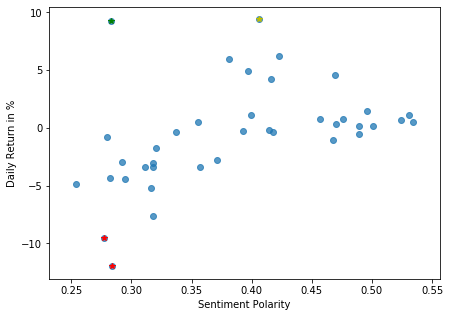

In [5]:
plt.figure(figsize=(7,5))
plt.scatter(ts['Sentiment Polarity'],ts['Daily Return in %'], alpha=0.75)
plt.plot(ts['Sentiment Polarity'][28],ts['Daily Return in %'][28], 'g*')
plt.plot(ts['Sentiment Polarity'][35],ts['Daily Return in %'][35], 'y*')
plt.plot(ts['Sentiment Polarity'][29],ts['Daily Return in %'][29], 'r*')
plt.plot(ts['Sentiment Polarity'][27],ts['Daily Return in %'][27], 'r*')
plt.xlabel("Sentiment Polarity")
plt.ylabel("Daily Return in %")
plt.show()

In [6]:
q1 = ts['Daily Return in %'].quantile(0.25)
q3 = ts['Daily Return in %'].quantile(0.75)
iqr = q3 - q1

print(q1-1.5*iqr)
print(q3+1.5*iqr)


-9.37
7.109999999999999


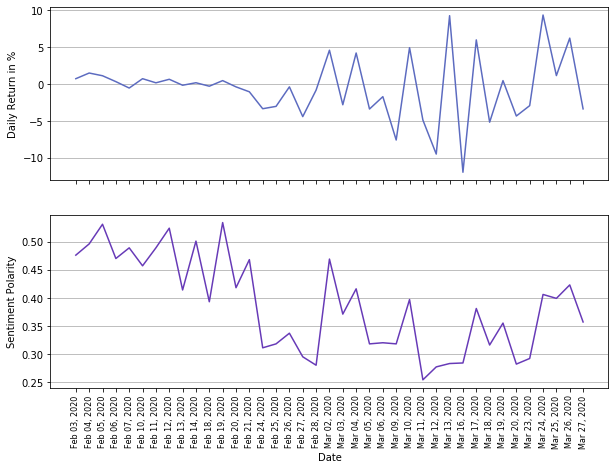

In [7]:
fig, axs = plt.subplots(2, sharex=True, sharey=False, figsize=(10,7))
#fig.suptitle('Relevance and Stock Price Over Time')


x = ts['Date']
plt.xticks(rotation=90, fontsize=8)

axs[0].yaxis.grid() 
axs[1].yaxis.grid() 

axs[0].plot(x, ts['Daily Return in %'],color='#5C6BC0')
axs[1].plot(x, ts['Sentiment Polarity'],color='#673AB7')

axs[0].set_ylabel("Daily Return in %",fontsize=10)
axs[1].set_ylabel("Sentiment Polarity",fontsize=10)

axs[1].set_xlabel("Date",fontsize=10)
plt.show()

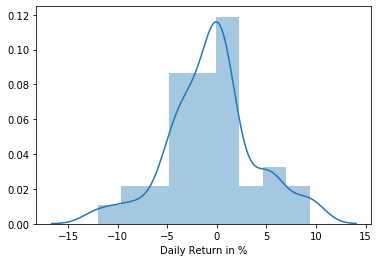

In [8]:
sns.distplot(ts['Daily Return in %'])

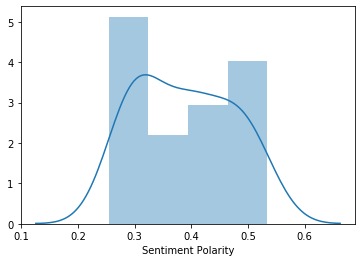

In [9]:
sns.distplot(ts['Sentiment Polarity'])

In [10]:
tsNO3 = pd.DataFrame(data=ts)
tsNO3 = tsNO3.drop(tsNO3.index[[28]])
tsNO3

,Date,Daily Return in %,Sentiment Polarity
0,"Feb 03, 2020",0.73,0.476
1,"Feb 04, 2020",1.50,0.496
2,"Feb 05, 2020",1.13,0.531
3,"Feb 06, 2020",0.33,0.470
4,"Feb 07, 2020",-0.54,0.489
5,"Feb 10, 2020",0.73,0.457
6,"Feb 11, 2020",0.17,0.489
7,"Feb 12, 2020",0.65,0.524
8,"Feb 13, 2020",-0.16,0.414
9,"Feb 14, 2020",0.18,0.501


LinregressResult(slope=29.211065686427443, intercept=-12.174088697995725, rvalue=0.5795339116840152, pvalue=0.00013741975438801213, stderr=6.846163416372961)


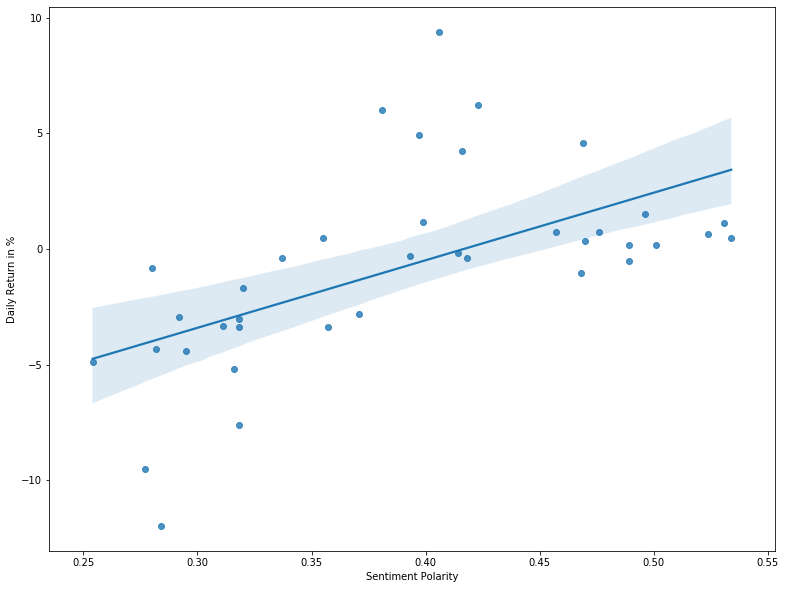

In [11]:
plt.figure(figsize=(13,10))
sns.regplot(data=tsNO3, x='Sentiment Polarity', y='Daily Return in %')
print(linregress(tsNO3['Sentiment Polarity'],tsNO3['Daily Return in %']))

In [12]:
tsNO2 = pd.DataFrame(data=ts)
tsNO2 = tsNO2.drop(tsNO2.index[[28,35]])
tsNO2

,Date,Daily Return in %,Sentiment Polarity
0,"Feb 03, 2020",0.73,0.476
1,"Feb 04, 2020",1.50,0.496
2,"Feb 05, 2020",1.13,0.531
3,"Feb 06, 2020",0.33,0.470
4,"Feb 07, 2020",-0.54,0.489
5,"Feb 10, 2020",0.73,0.457
6,"Feb 11, 2020",0.17,0.489
7,"Feb 12, 2020",0.65,0.524
8,"Feb 13, 2020",-0.16,0.414
9,"Feb 14, 2020",0.18,0.501


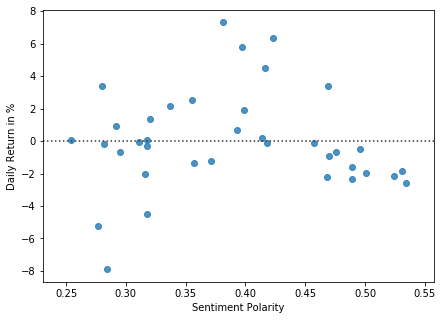

In [13]:
plt.figure(figsize=(7,5))
sns.residplot(data=tsNO2, x='Sentiment Polarity', y='Daily Return in %')
plt.show()

LinregressResult(slope=28.610407614798984, intercept=-12.201842753555386, rvalue=0.6194286207885229, pvalue=4.355624325068606e-05, stderr=6.1291143258925365)


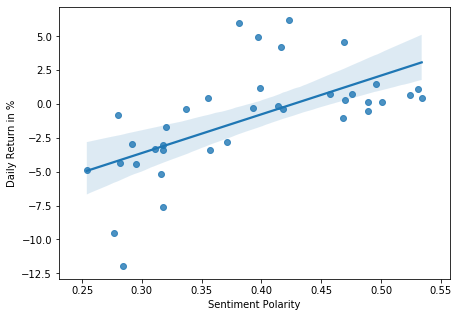

In [14]:
plt.figure(figsize=(7,5))
sns.regplot(data=tsNO2, x='Sentiment Polarity', y='Daily Return in %')
print(linregress(tsNO2['Sentiment Polarity'],tsNO2['Daily Return in %']))


In [15]:
tsNO = pd.DataFrame(data=ts)
tsNO = tsNO.drop(tsNO.index[[27,28,29,35]])
tsNO

,Date,Daily Return in %,Sentiment Polarity
0,"Feb 03, 2020",0.73,0.476
1,"Feb 04, 2020",1.50,0.496
2,"Feb 05, 2020",1.13,0.531
3,"Feb 06, 2020",0.33,0.470
4,"Feb 07, 2020",-0.54,0.489
5,"Feb 10, 2020",0.73,0.457
6,"Feb 11, 2020",0.17,0.489
7,"Feb 12, 2020",0.65,0.524
8,"Feb 13, 2020",-0.16,0.414
9,"Feb 14, 2020",0.18,0.501


In [16]:
print(linregress(tsNO['Sentiment Polarity'],tsNO['Daily Return in %']))
print(linregress(ts['Sentiment Polarity'],ts['Daily Return in %']))

LinregressResult(slope=22.12008902026907, intercept=-9.254671846346051, rvalue=0.5714767249537198, pvalue=0.0003359788324972495, stderr=5.529330348535928)
LinregressResult(slope=24.08986875602463, intercept=-9.850377582624011, rvalue=0.4552354020856667, pvalue=0.003591561029147541, stderr=7.745841531263473)


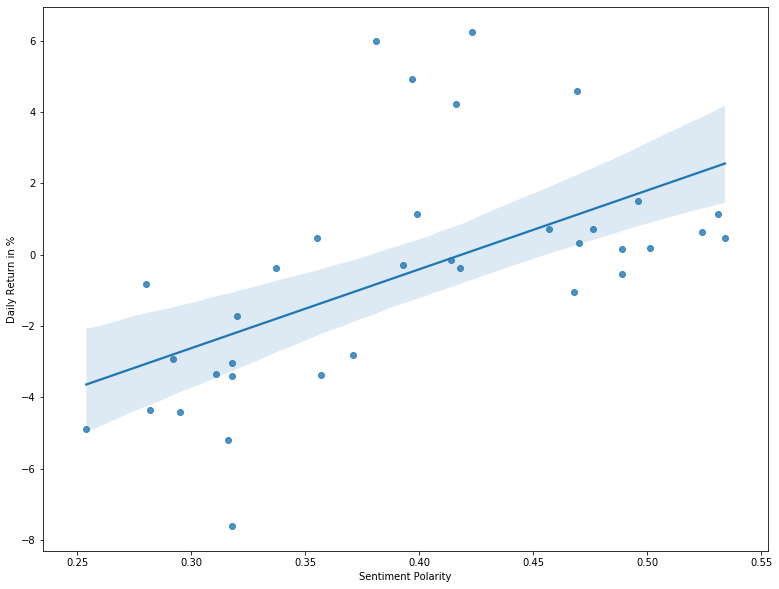

In [17]:
plt.figure(figsize=(13,10))
sns.regplot(data=tsNO, x='Sentiment Polarity', y='Daily Return in %')

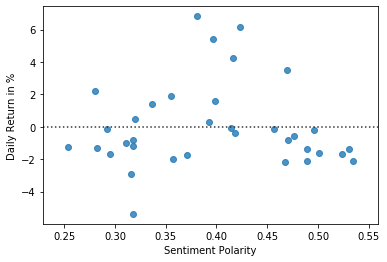

In [18]:
sns.residplot(x='Sentiment Polarity',y='Daily Return in %',data=tsNO)

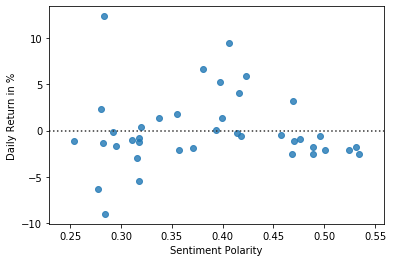

In [19]:
sns.residplot(x='Sentiment Polarity',y='Daily Return in %',data=ts)

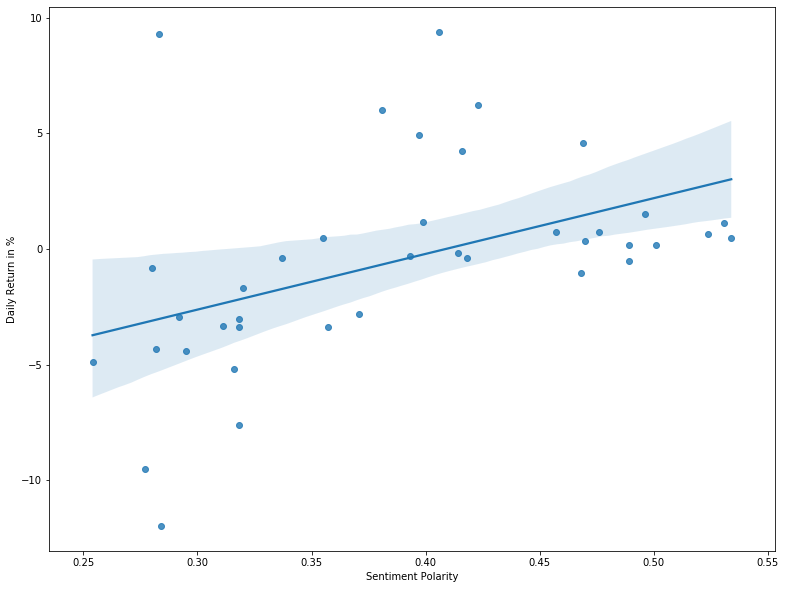

In [20]:
#linear relationship between sentiment polarity and daily returns (%)
plt.figure(figsize=(13,10))
sns.regplot(data=ts, x='Sentiment Polarity', y='Daily Return in %')

In [22]:
gDelta = pd.read_excel(r'C:\Users\timod\Desktop\SPX_gDelta_all.xlsx')
gDelta['Daily Return in %'] = ts['Daily Return in %']

gDelta

,Date,buy S&P 500,sell S&P 500,Delta,Daily Return in %
0,2020-02-03,14,0,14,0.73
1,2020-02-04,12,12,0,1.50
2,2020-02-05,10,12,-2,1.13
3,2020-02-06,12,0,12,0.33
4,2020-02-07,18,12,6,-0.54
5,2020-02-10,21,6,15,0.73
6,2020-02-11,15,6,9,0.17
7,2020-02-12,13,0,13,0.65
8,2020-02-13,11,9,2,-0.16
9,2020-02-14,20,6,14,0.18


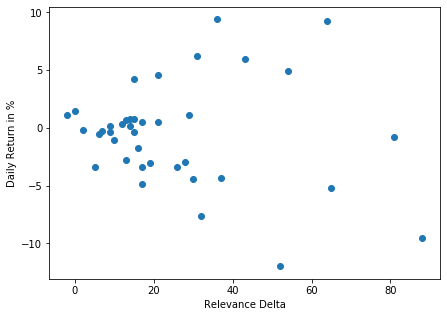

In [23]:
plt.figure(figsize=(7,5))
plt.scatter(x='Delta',y='Daily Return in %',data=gDelta)
plt.xlabel("Relevance Delta")
plt.ylabel("Daily Return in %")
plt.show()

In [37]:
GT_Delta = pd.read_excel(r'C:\Users\timod\Desktop\test_gDelta_spx.xlsx')
GT_Delta['Daily Return in %'] = ts['Daily Return in %']
GT_Delta


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\timod\\Desktop\\test_gDelta_spx.xlsx'

In [38]:
plt.figure(figsize=(13,10))
plt.scatter(x='GT_Delta',y='Daily Return in %',data=GT_Delta)
plt.show()

NameError: name 'GT_Delta' is not defined

<Figure size 936x720 with 0 Axes>

In [24]:
gt = pd.read_excel(r'C:\Users\timod\Desktop\S&P500_GoogleTrends.xlsx')
gt['Daily Return in %'] = ts['Daily Return in %'].abs()
gt = gt.drop(gt.index[[28,35]])
gt['S&P 500'] = gt['S&P 500']/100
gt

,Date,S&P 500,Daily Return in %
0,2020-02-03,0.15,0.73
1,2020-02-04,0.15,1.50
2,2020-02-05,0.16,1.13
3,2020-02-06,0.16,0.33
4,2020-02-07,0.14,0.54
5,2020-02-10,0.12,0.73
6,2020-02-11,0.14,0.17
7,2020-02-12,0.15,0.65
8,2020-02-13,0.15,0.16
9,2020-02-14,0.13,0.18


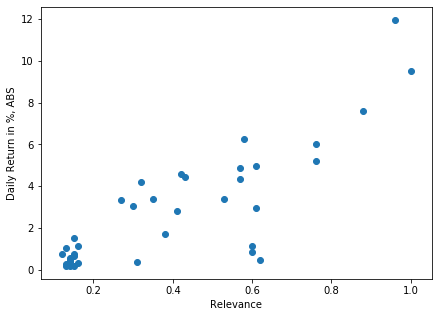

LinregressResult(slope=8.960598672151132, intercept=-0.7363696840000338, rvalue=0.8267396188468501, pvalue=2.888884892830342e-10, stderr=1.0306761126824016)


In [25]:
plt.figure(figsize=(7,5))
plt.scatter(x='S&P 500',y='Daily Return in %',data=gt)
plt.xlabel('Relevance')
plt.ylabel('Daily Return in %, ABS')
plt.show()
print(linregress(gt['S&P 500'],gt['Daily Return in %']))

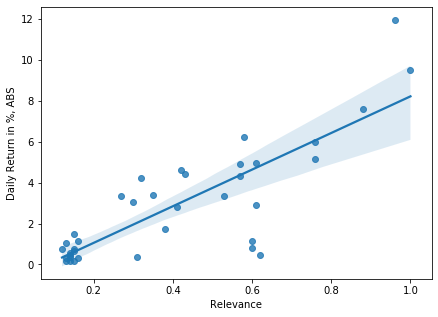

LinregressResult(slope=8.960598672151132, intercept=-0.7363696840000338, rvalue=0.8267396188468501, pvalue=2.888884892830342e-10, stderr=1.0306761126824016)


In [26]:
plt.figure(figsize=(7,5))
sns.regplot(x='S&P 500',y='Daily Return in %',data=gt)
plt.xlabel('Relevance')
plt.ylabel('Daily Return in %, ABS')
plt.show()
print(linregress(gt['S&P 500'],gt['Daily Return in %']))

In [27]:
GTT = pd.DataFrame()
GTT['Date'], GTT['Sentiment Polarity'], GTT['Relevance'], GTT['Daily Return in %'] = gt['Date'], ts['Sentiment Polarity'], gt['S&P 500'], ts['Daily Return in %']
GTT

,Date,Sentiment Polarity,Relevance,Daily Return in %
0,2020-02-03,0.476,0.15,0.73
1,2020-02-04,0.496,0.15,1.50
2,2020-02-05,0.531,0.16,1.13
3,2020-02-06,0.470,0.16,0.33
4,2020-02-07,0.489,0.14,-0.54
5,2020-02-10,0.457,0.12,0.73
6,2020-02-11,0.489,0.14,0.17
7,2020-02-12,0.524,0.15,0.65
8,2020-02-13,0.414,0.15,-0.16
9,2020-02-14,0.501,0.13,0.18


<IPython.core.display.Javascript object>


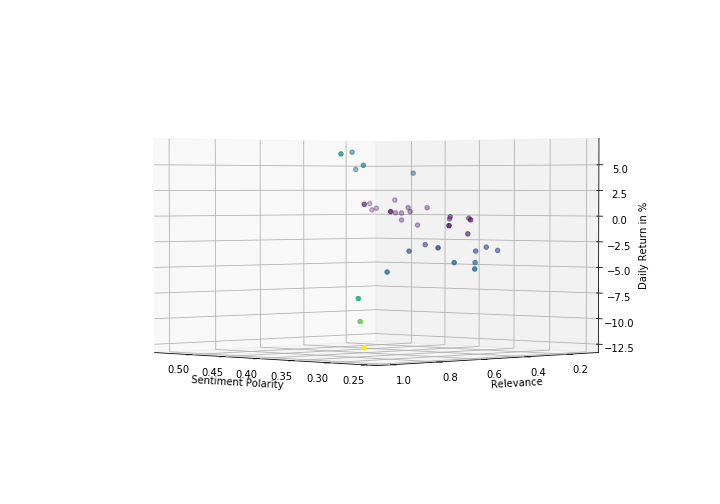

In [29]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

X = GTT['Sentiment Polarity']
Y = GTT['Relevance']
Z = GTT['Daily Return in %']

ax.scatter(X,Y,Z, c=np.linalg.norm([X,Y,Z],axis=0))
ax.set_xlabel('Sentiment Polarity')
ax.set_ylabel('Relevance')
ax.set_zlabel('Daily Return in %')

plt.show()

In [33]:
GTT['test Relevance'] = GTT['Relevance']*100
GTT

,Date,Sentiment Polarity,Relevance,Daily Return in %,test Relevance
0,2020-02-03,0.476,0.15,0.73,15.0
1,2020-02-04,0.496,0.15,1.50,15.0
2,2020-02-05,0.531,0.16,1.13,16.0
3,2020-02-06,0.470,0.16,0.33,16.0
4,2020-02-07,0.489,0.14,-0.54,14.0
5,2020-02-10,0.457,0.12,0.73,12.0
6,2020-02-11,0.489,0.14,0.17,14.0
7,2020-02-12,0.524,0.15,0.65,15.0
8,2020-02-13,0.414,0.15,-0.16,15.0
9,2020-02-14,0.501,0.13,0.18,13.0


In [35]:
import statsmodels.api as sm
from sklearn import linear_model

X = sm.add_constant(GTT[['Sentiment Polarity','Relevance']])
y = GTT['Daily Return in %']

regr = linear_model.LinearRegression()
regr.fit(X,y)

model = sm.OLS(y, X).fit()
 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -11.974262534385831
Coefficients: 
 [ 0.         28.214025   -0.18210836]
                            OLS Regression Results                            
Dep. Variable:      Daily Return in %   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     10.59
Date:                Sat, 02 May 2020   Prob (F-statistic):           0.000266
Time:                        12:10:48   Log-Likelihood:                -93.506
No. Observations:                  37   AIC:                             193.0
Df Residuals:                      34   BIC:                             197.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------